In [3]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import time
import numpy as np

data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)
all_data["content"] = all_data.apply(lambda x: x["content"].split(" "), axis=1)

In [ ]:
piece = ['2020 01 21','2020 01 31','2020 02 10','2020 02 20','2020 03 01','2020 03 11','2020 03 21']
tmp=[0]
for i in range(all_data.shape[0]):
    if all_data['time'][i] in piece and all_data['time'][i]!=all_data['time'][i-1]:
        tmp.append(i-1)
tmp.append(all_data.shape[0])

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
##matplotlib inline
# Helper function
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    return count_dict

In [ ]:
for div in range(1,len(tmp)):
    start=tmp[div-1]
    end=tmp[div]
    data=all_data[start:end]
    count_data = count_vectorizer.fit_transform(data['content'])
    dict=plot_10_most_common_words(count_data, count_vectorizer)

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


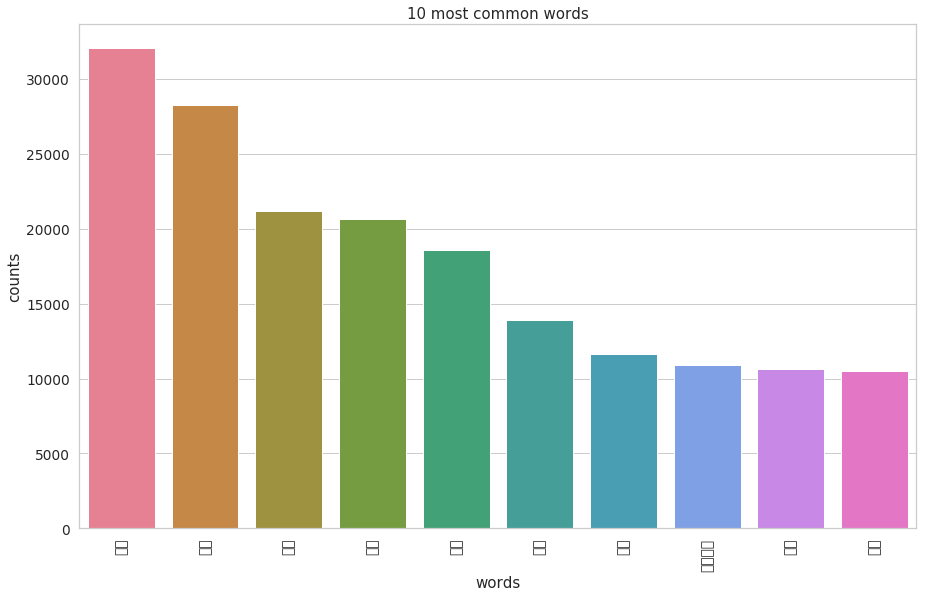

In [7]:
# count_vectorizer = CountVectorizer()
# count_data = count_vectorizer.fit_transform(data1['content'])
# _dict=plot_10_most_common_words(count_data, count_vectorizer)